# Дипломный проект

Тема: "Предсказание уровня адаптации студентов в онлайн-образованию" <br>
Выполнила: Селедкова Кристина

**Описание задачи**

Цель - предсказать уровень адаптивности студендов 

Зачем?  

Повысить вероятность окончания курса студентом

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**План работы**
* [1. Загрузка данных](#load)
* [2. Работа с типами данных](#types)
* [3. Визуализация данных](#visual)
* [4. Перекодированние](#decode)

In [3]:
DATASET_PATH = './students_adaptability_level_online_education.csv'
PREPARED_DATASET_PATH = './date_prepared.csv'

### 1. Загрузка данных <a class='anchor' id='load'>

**Описание датасета**

Уровень адаптации учащихся в онлайн-образовании.

* **Adaptivity level** - целевая переменная, уровень адаптивности
* **Gender** - пол
* **Age** - возраст
* **Education Level** - уровень образования
* **Institution Type** - тип учреждения
* **IT Student** - студент обучается на IT прогремме
* **Location in Town** - расположение в городе
* **Load-shedding** - сброс нагрузки ??
* **Financial Condition** - финансовое состояние
* **Internet Type** - тип интернета
* **Network Type** - тип сети
* **Class Duration** - продолжительность занятий
* **Self LMS** - самостоятеотное LMS
* **Device** - устройства, с которых смотрят курс

In [4]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


### 2. Проверка данных (типы и пропуски)<a class='anchor' id='types'>

In [5]:
df.info() #посмотрим на типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


Датасет состоит из 1205 строк с типом данных Object или String. Предполагается, что все независимые переменные являются категориальными признаками.

In [6]:
df.isna().sum() #проверим наличие пропусков

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

Пропуски отсутсвуют

In [7]:
df.isnull().sum() #проверим количество нулевых значений

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

Нулевые значения отсутсвуют 

In [8]:
df.describe().T #посмотрим на статистику

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


Поскольку все столбцы данных являются категориальными, мы видим количество уникальных значений по переменным, самое популярное значение и частоту встречающегося популярног значения

### 3. Визуализация данных<a class='anchor' id='visual'>

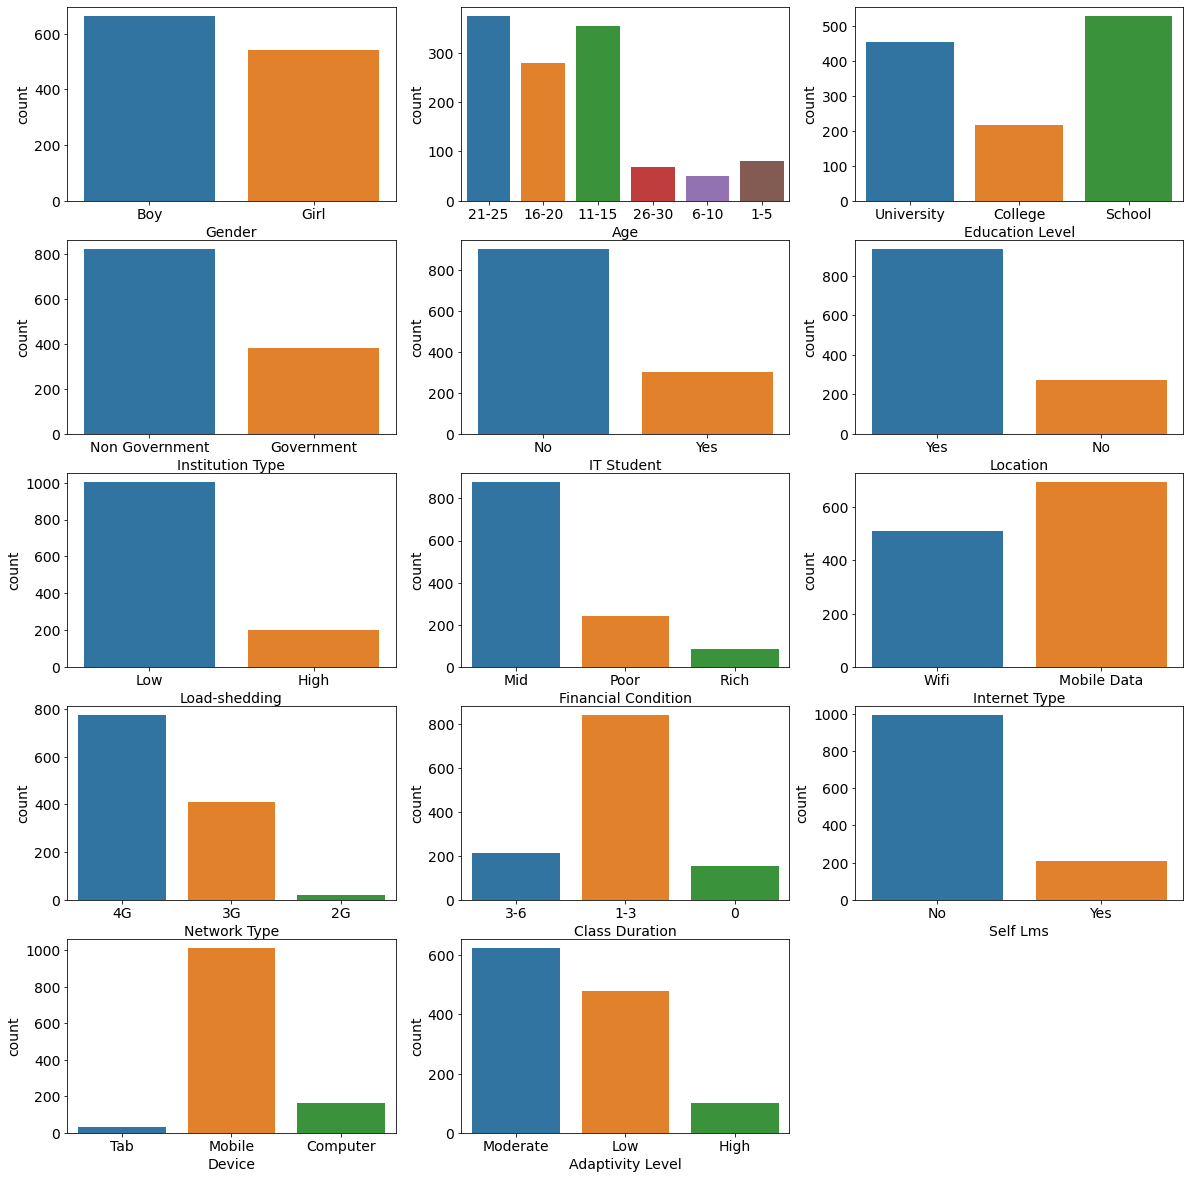

In [9]:
i = 1
plt.figure(figsize = (20,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df)
    i +=1

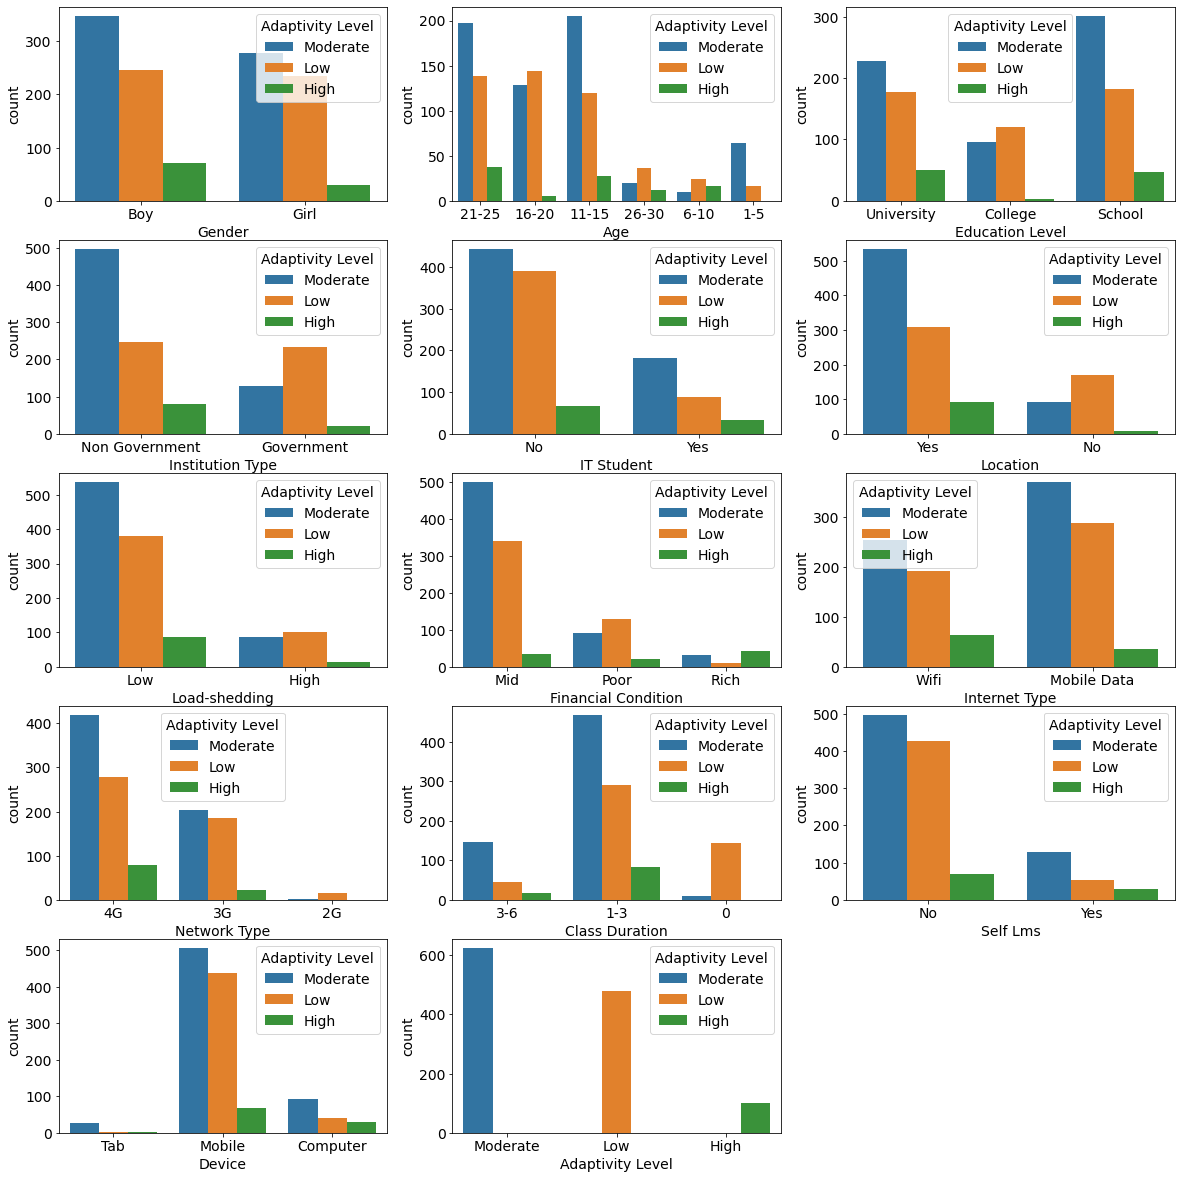

In [10]:
i = 1
plt.figure(figsize = (20,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = df)
    i +=1

### 4. Перекодированние данных <a class='anchor' id='decode'>

In [11]:
#уровень адаптации
def target_to_binary(X):

    X['Adaptivity_binary'] = 0
    X.loc[X['Adaptivity Level'] == 'Moderate', 'Adaptivity_binary'] = 1
    X.loc[X['Adaptivity Level'] == 'Low', 'Adaptivity_binary'] = 2
    X.loc[X['Adaptivity Level'] == 'Hight', 'Adaptivity_binary'] = 3

    return X

#пол
def gender_to_binary(X):

    X['gender_binary'] = 0
    X.loc[X['Gender'] == 'Boy', 'gender_binary'] = 1  

    return X

#возраст
def age_to_binary(X):

    X['age_binary'] = 0
    X.loc[X['Age'] == '1-5', 'age_binary'] = 1
    X.loc[X['Age'] == '6-10', 'age_binary'] = 2
    X.loc[X['Age'] == '11-15', 'age_binary'] = 3
    X.loc[X['Age'] == '16-20', 'age_binary'] = 4
    X.loc[X['Age'] == '21-25', 'age_binary'] = 5
    X.loc[X['Age'] == '26-30', 'age_binary'] = 6

    return X

#уровень образования
def edu_to_binary(X):

    X['edu_binary'] = 0
    X.loc[X['Education Level'] == 'School', 'edu_binary'] = 1
    X.loc[X['Education Level'] == 'University', 'edu_binary'] = 2
    X.loc[X['Education Level'] == 'College', 'edu_binary'] = 3

    return X

#тип учреждения
def inst_to_binary(X):

    X['inst_binary'] = 0
    X.loc[X['Institution Type'] == 'Non Government', 'inst_binary'] = 1
    X.loc[X['Institution Type'] == 'Government', 'inst_binary'] = 2

    return X

#IT специализация
def it_to_binary(X):

    X['it_binary'] = 0
    X.loc[X['IT Student'] == 'Yes', 'it_binary'] = 1

    return X

#IT специализация
def location_to_binary(X):

    X['location_binary'] = 0
    X.loc[X['Location'] == 'Yes', 'location_binary'] = 1

    return X

#Load-shedding
def shedding_to_binary(X):

    X['shedding_binary'] = 1
    X.loc[X['Load-shedding'] == 'High', 'shedding_binary'] = 2

    return X

#Financial Condition
def location_to_binary(X):

    X['fin_binary'] = 1
    X.loc[X['Financial Condition'] == 'Poor', 'fin_binary'] = 2
    X.loc[X['Financial Condition'] == 'Rich', 'fin_binary'] = 3

    return X

#Internet Type
def internet_to_binary(X):

    X['internet_binary'] = 1
    X.loc[X['Internet Type'] == 'Wifi', 'internet_binary'] = 2

    return X

#Network Type
def network_to_binary(X):

    X['network_binary'] = 1
    X.loc[X['Network Type'] == '3G', 'network_binary'] = 2
    X.loc[X['Network Type'] == '2G', 'network_binary'] = 3

    return X

#Class Duration
def duration_to_binary(X):

    X['class_duration_binary'] = 0
    X.loc[X['Class Duration'] == '1-3', 'class_duration_binary'] = 1
    X.loc[X['Class Duration'] == '3-6', 'class_duration_binary'] = 2

    return X

#Self Lms
def lms_to_binary(X):

    X['lms_binary'] = 0
    X.loc[X['Self Lms'] == 'Yes', 'lms_binary'] = 1

    return X

#Device
def device_to_binary(X):

    X['device_binary'] = 1
    X.loc[X['Device'] == 'Computer', 'device_binary'] = 2
    X.loc[X['Device'] == 'Tab', 'device_binary'] = 3

    return X

In [12]:
df = target_to_binary(df)
df = gender_to_binary(df)
df = age_to_binary(df)
df = edu_to_binary(df)
df = inst_to_binary(df)
df = it_to_binary(df)
df = location_to_binary(df)
df = shedding_to_binary(df)
df = location_to_binary(df)
df = internet_to_binary(df)
df = network_to_binary(df)
df = duration_to_binary(df)
df = lms_to_binary(df)
df = device_to_binary(df)

In [13]:
df.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,...,edu_binary,inst_binary,it_binary,fin_binary,shedding_binary,internet_binary,network_binary,class_duration_binary,lms_binary,device_binary
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,...,2,1,0,1,1,2,1,2,0,3
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,...,2,1,0,1,2,1,1,1,1,1
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,...,3,2,0,1,1,2,1,1,0,1
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,...,1,1,0,1,1,1,1,1,0,1
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,...,1,1,0,2,1,1,2,0,0,1


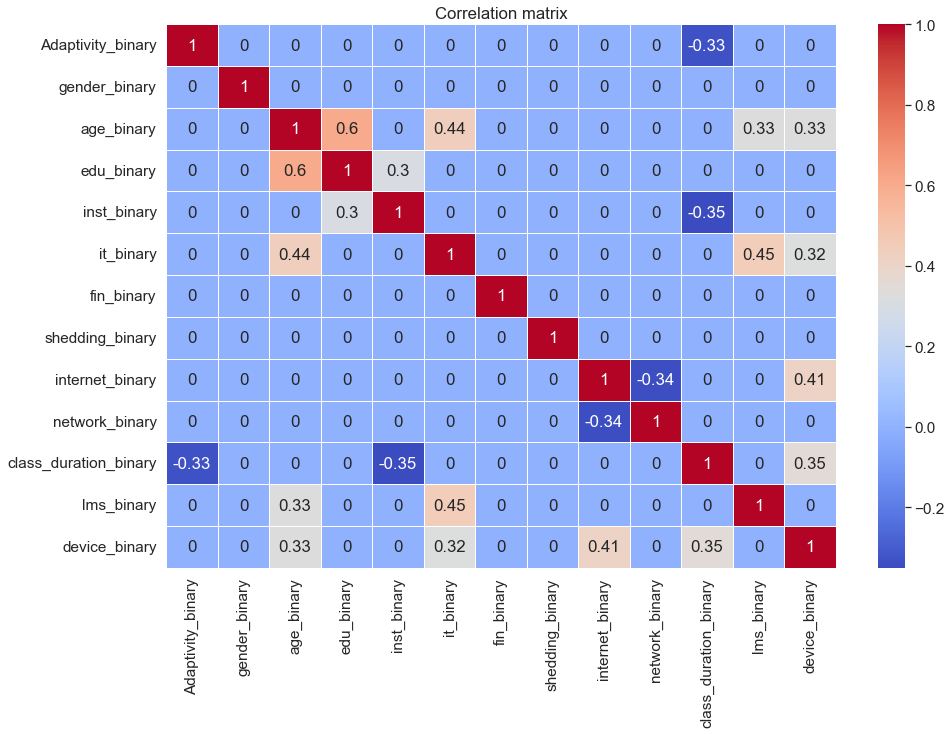

In [14]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Судя по матрице корреляции - наибольший вклад в адаптивность студента вносит длительность класса. Причем, чем он меньше, тем лучше адаптивность.